# Modeling

## 1. Sampling X

In [103]:
import pandas as pd
df_train = pd.read_csv("Loan_Train.csv")
X_test = pd.read_csv("Loan_Test_feature.csv")
y_test = pd.read_csv("Loan_Test_target.csv")

In [104]:
df_train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [105]:
X_test

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [106]:
y_test

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,1
27997,27998,0
27998,27999,0


In [107]:
df_train.drop(['Id', 'Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE'], axis=1, inplace=True)
X_train = df_train.drop(['Risk_Flag'], axis=1)
y_train = df_train.Risk_Flag

In [108]:
X_test.drop(['ID', 'Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE'], axis=1, inplace=True)

In [109]:
X_test

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,4,13
1,1215004,25,5,5,10
2,8901342,50,12,9,14
3,1944421,49,9,3,12
4,13429,25,18,13,11
...,...,...,...,...,...
27995,9955481,57,13,5,10
27996,2917765,47,9,9,14
27997,8082415,24,5,4,13
27998,9474180,51,13,13,14


In [110]:
y_test.drop(['id'], axis=1, inplace=True)
y_test

,risk_flag
0,0
1,0
2,1
3,0
4,0
...,...
27995,0
27996,1
27997,0
27998,0


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [202]:
scaler.fit(X_train)

X_test_sc = scaler.transform(X_test)

### 1-1. LDA

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

start = time.time()

clf_X_LDA = LinearDiscriminantAnalysis()
clf_X_LDA.fit(X_train, y_train)

print("time :", time.time() - start) 

time : 0.42984700202941895


In [203]:
y_pred_X_LDA = clf_X_LDA.predict(X_test_sc)

In [291]:
print("OverSampling 하지 않음 + LDA - train_score : %.4f, test score : %.4f" % (clf_X_LDA.score(X_train, y_train), clf_X_LDA.score(X_test_sc, y_test)))

OverSampling 하지 않음 + LDA - train_score : 0.8770, test score : 0.8717


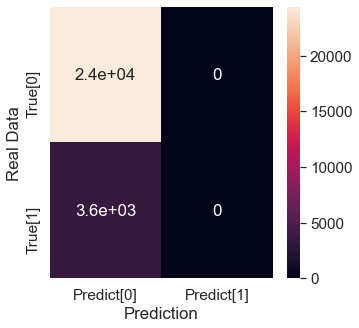

,Predict[0],Predict[1]
True[0],24407,0
True[1],3593,0


In [205]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_X_LDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [206]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------OverSampling 하지 않음 + LDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_X_LDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_X_LDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_X_LDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_X_LDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_X_LDA))

--------OverSampling 하지 않음 + LDA--------
정확도 accuracy: 0.872
정밀도 precision: 0.000
재현율 recall: 0.000
F1-score: 0.000
AUC: 0.500


C:\Users\gwak\anaconda3\envs\kooc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1-2. QDA

In [136]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start = time.time()

clf_X_QDA = QuadraticDiscriminantAnalysis()
clf_X_QDA.fit(X_train, y_train)

print("time :", time.time() - start) 

time : 0.16356325149536133


In [207]:
y_pred_X_QDA = clf_X_QDA.predict(X_test_sc)

In [138]:
print(clf_X_QDA.score(X_train, y_train))

0.877


In [292]:
print("OverSampling 하지 않음 + QDA - train_score : %.4f, test score : %.4f" % (clf_X_QDA.score(X_train, y_train), clf_X_QDA.score(X_test_sc, y_test)))

OverSampling 하지 않음 + QDA - train_score : 0.8770, test score : 0.8717


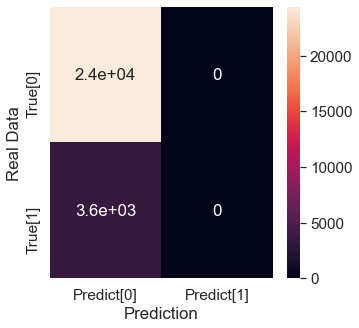

,Predict[0],Predict[1]
True[0],24407,0
True[1],3593,0


In [209]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_X_QDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [210]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------OverSampling 하지 않음 + QDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_X_QDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_X_QDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_X_QDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_X_QDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_X_QDA))

--------OverSampling 하지 않음 + QDA--------
정확도 accuracy: 0.872
정밀도 precision: 0.000
재현율 recall: 0.000
F1-score: 0.000
AUC: 0.500


C:\Users\gwak\anaconda3\envs\kooc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1-3. Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression

start = time.time()

clf_X_lr = LogisticRegression()
clf_X_lr.fit(X_train, y_train)

print("time :", time.time() - start) 

time : 1.34440279006958


In [212]:
y_pred_X_lr = clf_X_lr.predict(X_test_sc)

In [293]:
print("OverSampling 하지 않음 + Logistic Regression - train_score : %.4f, test score : %.4f" % (clf_X_lr.score(X_train, y_train), clf_X_lr.score(X_test_sc, y_test)))

OverSampling 하지 않음 + Logistic Regression - train_score : 0.8770, test score : 0.5020


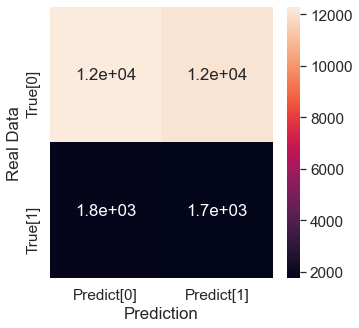

,Predict[0],Predict[1]
True[0],12307,12100
True[1],1845,1748


In [214]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_X_lr),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [215]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------OverSampling 하지 않음 + Logistic Regression--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_X_lr))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_X_lr))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_X_lr))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_X_lr))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_X_lr))

--------OverSampling 하지 않음 + Logistic Regression--------
정확도 accuracy: 0.502
정밀도 precision: 0.126
재현율 recall: 0.487
F1-score: 0.200
AUC: 0.495


### 1-4. Neural Network

In [38]:
from sklearn.neural_network import MLPClassifier

start = time.time()

clf_X_NN = MLPClassifier()
clf_X_NN.fit(X_train, y_train)

print("time :", time.time() - start) 

time : 363.4409513473511


In [66]:
y_pred_X_NN = clf_X_NN.predict(X_test_sc)

In [92]:
print("Oversampling 하지 않음 + Neural Network - train_score : %.4f, test score : %.4f" % (clf_X_NN.score(X_train, y_train), clf_X_NN.score(X_test_sc, y_test)))

Oversampling 하지 않음 + Neural Network - train_score : 0.8770, test score : 0.8717


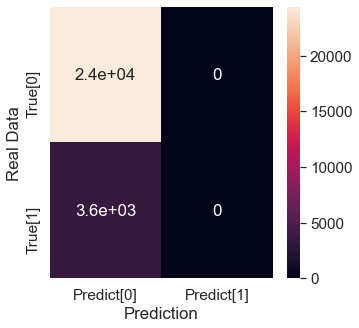

,Predict[0],Predict[1]
True[0],24407,0
True[1],3593,0


In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_X_NN),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Oversampling 하지 않음 + Neural Network--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_X_NN))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_X_NN))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_X_NN))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_X_NN))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_X_NN))

--------Oversampling 하지 않음 + Neural Network--------
정확도 accuracy: 0.872
정밀도 precision: 0.000
재현율 recall: 0.000
F1-score: 0.000
AUC: 0.500


C:\Users\gwak\anaconda3\envs\kooc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. SMOTE

In [148]:
X_train_s = pd.read_csv("smote_x.csv")
y_train_s = pd.read_csv("smote_y.csv")

In [149]:
X_train_s.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train_s

,0,1,2,3,4
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...
442003,1.681222,1.360571,-1.680018,-1.736714,1.431135
442004,1.354685,-1.345189,-0.847042,-0.365742,0.001577
442005,-0.492002,0.178502,0.485719,1.827814,1.431135
442006,-0.403647,-0.566048,0.449758,0.516028,0.001577


In [150]:
y_train_s = y_train_s['0']
y_train_s

0         0
1         0
2         0
3         1
4         1
         ..
442003    1
442004    1
442005    1
442006    1
442007    1
Name: 0, Length: 442008, dtype: int64

### 2-1. LDA

In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

start = time.time()

clf_s_LDA = LinearDiscriminantAnalysis()
clf_s_LDA.fit(X_train_s, y_train_s)

print("time :", time.time() - start) 

time : 0.8407518863677979


In [216]:
y_pred_s_LDA = clf_s_LDA.predict(X_test_sc)

In [294]:
print("SMOTE + LDA - train_score : %.4f, test score : %.4f" % (clf_s_LDA.score(X_train_s, y_train_s), clf_s_LDA.score(X_test_sc, y_test)))

SMOTE + LDA - train_score : 0.5246, test score : 0.4886


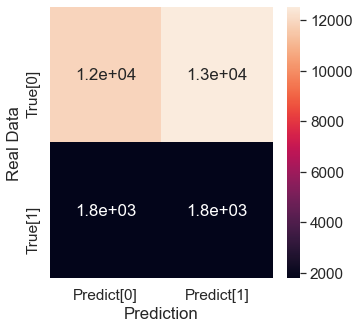

,Predict[0],Predict[1]
True[0],11869,12538
True[1],1780,1813


In [218]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_s_LDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [229]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------SMOTE + LDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_s_LDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_s_LDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_s_LDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_s_LDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_s_LDA))

--------SMOTE + LDA--------
정확도 accuracy: 0.489
정밀도 precision: 0.126
재현율 recall: 0.505
F1-score: 0.202
AUC: 0.495


### 2-2. QDA

In [223]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start = time.time()

clf_s_QDA = QuadraticDiscriminantAnalysis()
clf_s_QDA.fit(X_train_s, y_train_s)

print("time :", time.time() - start) 

time : 0.28324127197265625


In [224]:
y_pred_s_QDA = clf_s_QDA.predict(X_test_sc)

In [295]:
print("SMOTE + QDA - train_score : %.4f, test score : %.4f" % (clf_s_QDA.score(X_train_s, y_train_s), clf_s_QDA.score(X_test_sc, y_test)))

SMOTE + QDA - train_score : 0.5295, test score : 0.4203


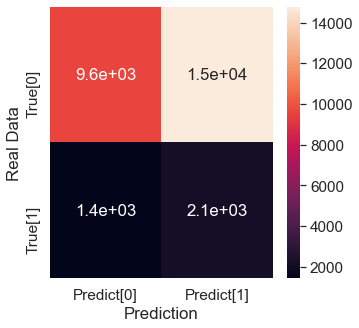

,Predict[0],Predict[1]
True[0],9620,14787
True[1],1444,2149


In [226]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_s_QDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [230]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------SMOTE + QDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_s_QDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_s_QDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_s_QDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_s_QDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_s_QDA))

--------SMOTE + QDA--------
정확도 accuracy: 0.420
정밀도 precision: 0.127
재현율 recall: 0.598
F1-score: 0.209
AUC: 0.496


### 2-3. Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression

start = time.time()

clf_s_lr = LogisticRegression()
clf_s_lr.fit(X_train_s, y_train_s)

print("time :", time.time() - start) 

time : 0.7529857158660889


In [232]:
y_pred_s_lr = clf_s_lr.predict(X_test_sc)

In [296]:
print("SMOTE + Logistic Regression - train_score : %.4f, test score : %.4f" % (clf_s_lr.score(X_train_s, y_train_s), clf_s_lr.score(X_test_sc, y_test)))

SMOTE + Logistic Regression - train_score : 0.5243, test score : 0.4886


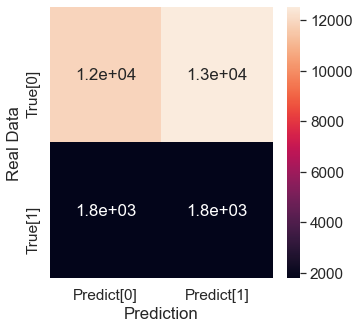

,Predict[0],Predict[1]
True[0],11870,12537
True[1],1783,1810


In [234]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_s_lr),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [235]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------SMOTE + Logistic Regression--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_s_lr))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_s_lr))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_s_lr))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_s_lr))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_s_lr))

--------SMOTE + Logistic Regression--------
정확도 accuracy: 0.489
정밀도 precision: 0.126
재현율 recall: 0.504
F1-score: 0.202
AUC: 0.495


### 2-4. Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier

start = time.time()

clf_s_NN = MLPClassifier()
clf_s_NN.fit(X_train_s, y_train_s)

print("time :", time.time() - start) 

time : 509.68353295326233


In [70]:
y_pred_s_NN = clf_s_NN.predict(X_test_sc)

In [91]:
print("SMOTE + Neural Network - train_score : %.4f, test score : %.4f" % (clf_s_NN.score(X_train_s, y_train_s), clf_s_NN.score(X_test_sc, y_test)))

SMOTE + Neural Network - train_score : 0.6463, test score : 0.1283


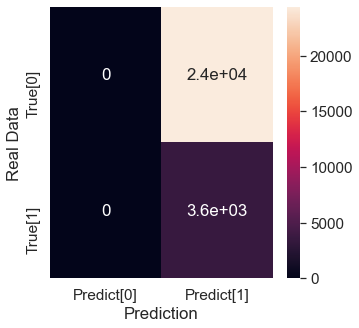

,Predict[0],Predict[1]
True[0],0,24407
True[1],0,3593


In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_s_NN),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------SMOTE + Neural Network--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_s_NN))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_s_NN))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_s_NN))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_s_NN))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_s_NN))

--------SMOTE + Neural Network--------
정확도 accuracy: 0.128
정밀도 precision: 0.128
재현율 recall: 1.000
F1-score: 0.227
AUC: 0.500


## 3. ADASYN

In [71]:
X_train_a = pd.read_csv("X_over_ada.csv")
y_train_a = pd.read_csv("y_over_ada.csv")

In [72]:
X_train_a

,Unnamed: 0,0,1,2,3,4
0,0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...,...
442208,442208,0.947530,0.511872,-0.086893,0.731036,0.716356
442209,442209,0.784896,0.425520,-0.168718,0.731036,0.716356
442210,442210,1.109147,0.588727,-0.159123,0.611664,0.716356
442211,442211,1.266664,0.860626,0.114757,0.731036,0.716356


In [73]:
X_train_a.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train_a

,0,1,2,3,4
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...
442208,0.947530,0.511872,-0.086893,0.731036,0.716356
442209,0.784896,0.425520,-0.168718,0.731036,0.716356
442210,1.109147,0.588727,-0.159123,0.611664,0.716356
442211,1.266664,0.860626,0.114757,0.731036,0.716356


In [74]:
y_train_a = y_train_a['0']
y_train_a

0         0
1         0
2         0
3         1
4         1
         ..
442208    1
442209    1
442210    1
442211    1
442212    1
Name: 0, Length: 442213, dtype: int64

### 3-1. LDA

In [236]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

start = time.time()

clf_a_LDA = LinearDiscriminantAnalysis()
clf_a_LDA.fit(X_train_a, y_train_a)

print("time :", time.time() - start) 

time : 0.8716676235198975


In [237]:
y_pred_a_LDA = clf_a_LDA.predict(X_test_sc)

In [297]:
print("ADASYN + LDA - train_score : %.4f, test score : %.4f" % (clf_a_LDA.score(X_train_a, y_train_a), clf_a_LDA.score(X_test_sc, y_test)))

ADASYN + LDA - train_score : 0.5140, test score : 0.4090


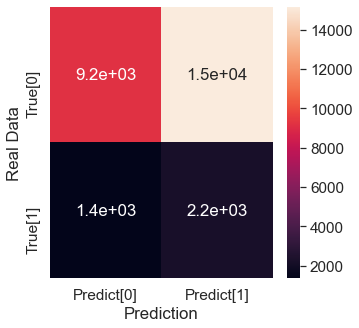

,Predict[0],Predict[1]
True[0],9221,15186
True[1],1361,2232


In [239]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_a_LDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [248]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------ADASYN + LDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_a_LDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_a_LDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_a_LDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_a_LDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_a_LDA))

--------ADASYN + LDA--------
정확도 accuracy: 0.409
정밀도 precision: 0.128
재현율 recall: 0.621
F1-score: 0.212
AUC: 0.500


### 3-2. QDA

In [251]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start = time.time()

clf_a_QDA = QuadraticDiscriminantAnalysis()
clf_a_QDA.fit(X_train_a, y_train_a)

print("time :", time.time() - start) 

time : 0.27223753929138184


In [252]:
y_pred_a_QDA = clf_a_QDA.predict(X_test_sc)

In [298]:
print("ADASYN + QDA - train_score : %.4f, test score : %.4f" % (clf_a_QDA.score(X_train_a, y_train_a), clf_a_QDA.score(X_test_sc, y_test)))

ADASYN + QDA - train_score : 0.5176, test score : 0.3792


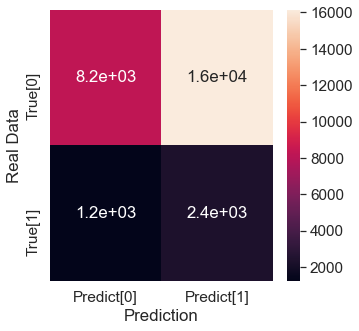

,Predict[0],Predict[1]
True[0],8244,16163
True[1],1219,2374


In [254]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_a_QDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [255]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------ADASYN + QDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_a_QDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_a_QDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_a_QDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_a_QDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_a_QDA))

--------ADASYN + QDA--------
정확도 accuracy: 0.379
정밀도 precision: 0.128
재현율 recall: 0.661
F1-score: 0.215
AUC: 0.499


### 3-3. Logistic Regression

In [256]:
from sklearn.linear_model import LogisticRegression

start = time.time()

clf_a_lr = LogisticRegression()
clf_a_lr.fit(X_train_a, y_train_a)

print("time :", time.time() - start) 

time : 0.5884244441986084


In [257]:
y_pred_a_lr = clf_a_lr.predict(X_test_sc)

In [299]:
print("ADASYN + Logistic Regression - train_score : %.4f, test score : %.4f" % (clf_a_lr.score(X_train_a, y_train_a), clf_a_lr.score(X_test_sc, y_test)))

ADASYN + Logistic Regression - train_score : 0.5140, test score : 0.4090


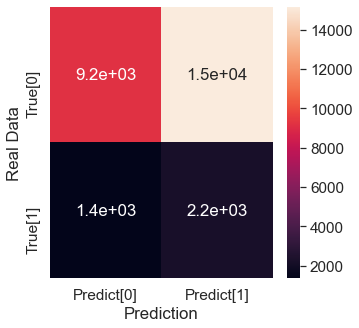

,Predict[0],Predict[1]
True[0],9221,15186
True[1],1361,2232


In [261]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_a_lr),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [262]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------ADASYN + Logistic Regression--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_a_lr))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_a_lr))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_a_lr))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_a_lr))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_a_lr))

--------ADASYN + Logistic Regression--------
정확도 accuracy: 0.409
정밀도 precision: 0.128
재현율 recall: 0.621
F1-score: 0.212
AUC: 0.500


### 3-4. Neural Network

In [51]:
from sklearn.neural_network import MLPClassifier

start = time.time()

clf_a_NN = MLPClassifier()
clf_a_NN.fit(X_train_a, y_train_a)

print("time :", time.time() - start) 

time : 339.7795033454895


In [76]:
y_pred_a_NN = clf_a_NN.predict(X_test_sc)

In [90]:
print("ADASYN + Neural Network - train_score : %.4f, test score : %.4f" % (clf_a_NN.score(X_train_a, y_train_a), clf_a_NN.score(X_test_sc, y_test)))

ADASYN + Neural Network - train_score : 0.6236, test score : 0.8717


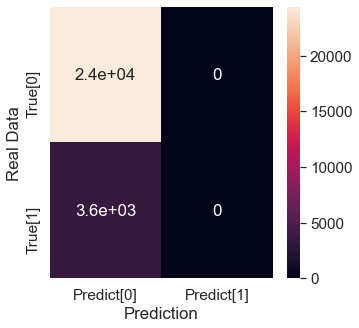

,Predict[0],Predict[1]
True[0],24407,0
True[1],3593,0


In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_a_NN),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------ADASYN + Neural Network--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_a_NN))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_a_NN))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_a_NN))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_a_NN))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_a_NN))

--------ADASYN + Neural Network--------
정확도 accuracy: 0.872
정밀도 precision: 0.000
재현율 recall: 0.000
F1-score: 0.000
AUC: 0.500


C:\Users\gwak\anaconda3\envs\kooc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Borderline-SMOTE

In [84]:
X_train_b = pd.read_csv("X_oversample_borderline.csv")
y_train_b = pd.read_csv("y_oversample_borderline.csv")

In [85]:
X_train_b

,Unnamed: 0,0,1,2,3,4
0,0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...,...
442003,442003,-0.295148,0.726162,-0.565437,-0.091547,0.716356
442004,442004,-0.646561,0.546732,-1.513422,-1.462520,-0.713202
442005,442005,-0.932097,-0.493935,-0.680447,-0.091547,1.431135
442006,442006,0.970591,-0.583344,-0.014067,0.731036,0.001577


In [86]:
X_train_b.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train_b

,0,1,2,3,4
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...
442003,-0.295148,0.726162,-0.565437,-0.091547,0.716356
442004,-0.646561,0.546732,-1.513422,-1.462520,-0.713202
442005,-0.932097,-0.493935,-0.680447,-0.091547,1.431135
442006,0.970591,-0.583344,-0.014067,0.731036,0.001577


In [87]:
y_train_b = y_train_b['0']
y_train_b

0         0
1         0
2         0
3         1
4         1
         ..
442003    1
442004    1
442005    1
442006    1
442007    1
Name: 0, Length: 442008, dtype: int64

### 4-1. LDA

In [242]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

start = time.time()

clf_b_LDA = LinearDiscriminantAnalysis()
clf_b_LDA.fit(X_train_b, y_train_b)

print("time :", time.time() - start) 

time : 0.7395205497741699


In [243]:
y_pred_b_LDA = clf_b_LDA.predict(X_test_sc)

In [300]:
print("Borderlind-SMOTE + LDA - train_score : %.4f, test score : %.4f" % (clf_b_LDA.score(X_train_b, y_train_b), clf_b_LDA.score(X_test_sc, y_test)))

Borderlind-SMOTE + LDA - train_score : 0.5290, test score : 0.5298


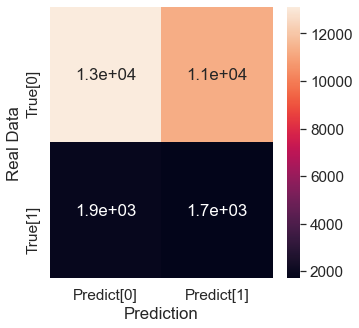

,Predict[0],Predict[1]
True[0],13128,11279
True[1],1888,1705


In [245]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_b_LDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [247]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Borderlind-SMOTE + LDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_b_LDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_b_LDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_b_LDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_b_LDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_b_LDA))

--------Borderlind-SMOTE + LDA--------
정확도 accuracy: 0.530
정밀도 precision: 0.131
재현율 recall: 0.475
F1-score: 0.206
AUC: 0.506


### 4-2. QDA

In [263]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start = time.time()

clf_b_QDA = QuadraticDiscriminantAnalysis()
clf_b_QDA.fit(X_train_b, y_train_b)

print("time :", time.time() - start) 

time : 0.33609914779663086


In [264]:
y_pred_b_QDA = clf_b_QDA.predict(X_test_sc)

In [301]:
print("Borderlind-SMOTE + QDA - train_score : %.4f, test score : %.4f" % (clf_b_QDA.score(X_train_b, y_train_b), clf_b_QDA.score(X_test_sc, y_test)))

Borderlind-SMOTE + QDA - train_score : 0.5283, test score : 0.5150


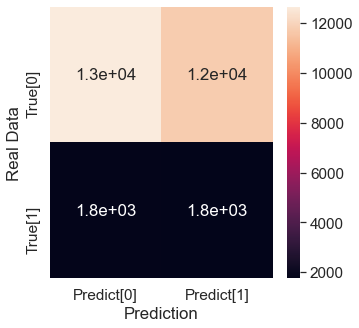

,Predict[0],Predict[1]
True[0],12661,11746
True[1],1834,1759


In [267]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_b_QDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [268]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Borderline-SMOTE + QDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_b_QDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_b_QDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_b_QDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_b_QDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_b_QDA))

--------Borderline-SMOTE + QDA--------
정확도 accuracy: 0.515
정밀도 precision: 0.130
재현율 recall: 0.490
F1-score: 0.206
AUC: 0.504


### 4-3. Logistic Regression

In [276]:
from sklearn.linear_model import LogisticRegression

start = time.time()

clf_b_lr = LogisticRegression()
clf_b_lr.fit(X_train_b, y_train_b)

print("time :", time.time() - start) 

time : 0.6442739963531494


In [95]:
y_pred_b_lr = clf_lr.predict(X_test_sc)

In [277]:
print(clf_b_lr.score(X_train_b, y_train_b))

0.5290469855749217


In [281]:
print("Borderline-SMOTE + Logistic Regression - train_score : %.4f, test score : %.4f" % (clf_b_lr.score(X_train_b, y_train_b), clf_b_lr.score(X_test_sc, y_test)))

Borderline-SMOTE + Logistic Regression - train_score : 0.5290, test score : 0.5297


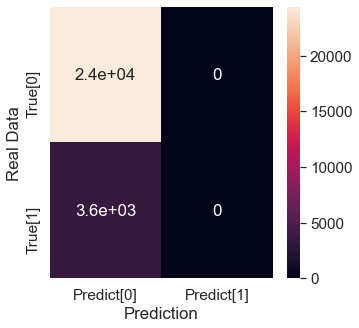

,Predict[0],Predict[1]
True[0],24407,0
True[1],3593,0


In [279]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_b_lr),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [280]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Borderline-SMOTE + Logistic Regression--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_b_lr))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_b_lr))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_b_lr))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_b_lr))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_b_lr))

--------Borderline-SMOTE + Logistic Regression--------
정확도 accuracy: 0.872
정밀도 precision: 0.000
재현율 recall: 0.000
F1-score: 0.000
AUC: 0.500


C:\Users\gwak\anaconda3\envs\kooc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4-4. Neural Network

In [59]:
from sklearn.neural_network import MLPClassifier

start = time.time()

clf_b_NN = MLPClassifier()
clf_b_NN.fit(X_train_b, y_train_b)

print("time :", time.time() - start) 

time : 621.0679948329926


In [80]:
y_pred_b_NN = clf_b_NN.predict(X_test_sc)

In [89]:
print("Borderling-SMOTE + Neural Network - train_score : %.4f, test score : %.4f" % (clf_b_NN.score(X_train_b, y_train_b), clf_b_NN.score(X_test_sc, y_test)))

Borderling-SMOTE + Neural Network - train_score : 0.6791, test score : 0.1283


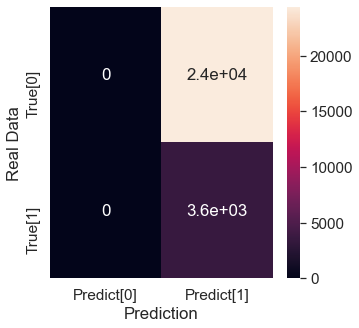

,Predict[0],Predict[1]
True[0],0,24407
True[1],0,3593


In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_b_NN),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Borderline-SMOTE + Neural Network--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_b_NN))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_b_NN))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_b_NN))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_b_NN))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_b_NN))

--------ADASYN + Neural Network--------
정확도 accuracy: 0.128
정밀도 precision: 0.128
재현율 recall: 1.000
F1-score: 0.227
AUC: 0.500


## 5. Distribution-SMOTE

In [185]:
X_train_d = pd.read_csv("X_over_var.csv")
y_train_d = pd.read_csv("y_over_var.csv")

In [186]:
X_train_d

,Unnamed: 0,0,1,2,3,4
0,0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...,...
442003,442003,0.492554,-0.583344,-1.180232,-0.914131,1.431135
442004,442004,0.844739,0.530123,-1.513422,-1.462520,0.001577
442005,442005,-1.344268,1.409176,0.818909,-0.914131,0.001577
442006,442006,-1.732423,-1.579604,-1.513422,-1.462520,1.431135


In [187]:
X_train_d.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train_d

,0,1,2,3,4
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,-0.914131,1.431135
...,...,...,...,...,...
442003,0.492554,-0.583344,-1.180232,-0.914131,1.431135
442004,0.844739,0.530123,-1.513422,-1.462520,0.001577
442005,-1.344268,1.409176,0.818909,-0.914131,0.001577
442006,-1.732423,-1.579604,-1.513422,-1.462520,1.431135


In [188]:
y_train_d = y_train_d['0']
y_train_d

0         0
1         0
2         0
3         1
4         1
         ..
442003    1
442004    1
442005    1
442006    1
442007    1
Name: 0, Length: 442008, dtype: int64

### 5-1. LDA

In [192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

start = time.time()

clf_d_LDA = LinearDiscriminantAnalysis()
clf_d_LDA.fit(X_train_d, y_train_d)

print("time :", time.time() - start) 

time : 0.7489955425262451


In [193]:
y_pred_d_LDA = clf_d_LDA.predict(X_test_sc)

In [302]:
print("Distribution-SMOTE + LDA - train_score : %.4f, test score : %.4f" % (clf_d_LDA.score(X_train_d, y_train_d), clf_d_LDA.score(X_test_sc, y_test)))

Distribution-SMOTE + LDA - train_score : 0.5225, test score : 0.4930


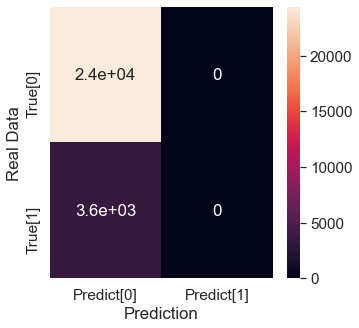

,Predict[0],Predict[1]
True[0],24407,0
True[1],3593,0


In [249]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_d_LDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [250]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Distribution-SMOTE + LDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_d_LDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_d_LDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_d_LDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_d_LDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_d_LDA))

--------Distribution-SMOTE + LDA--------
정확도 accuracy: 0.872
정밀도 precision: 0.000
재현율 recall: 0.000
F1-score: 0.000
AUC: 0.500


C:\Users\gwak\anaconda3\envs\kooc\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5-2. QDA

In [270]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start = time.time()

clf_d_QDA = QuadraticDiscriminantAnalysis()
clf_d_QDA.fit(X_train_d, y_train_d)

print("time :", time.time() - start) 

time : 0.22041010856628418


In [271]:
y_pred_d_QDA = clf_d_QDA.predict(X_test_sc)

In [272]:
print(clf_d_QDA.score(X_train_d, y_train_d))

0.5312188919657562


In [303]:
print("Distribution-SMOTE + QDA - train_score : %.4f, test score : %.4f" % (clf_d_QDA.score(X_train_d, y_train_d), clf_d_QDA.score(X_test_sc, y_test)))

Distribution-SMOTE + QDA - train_score : 0.5312, test score : 0.4279


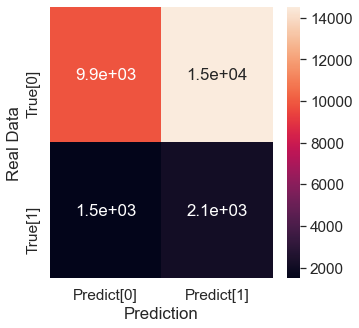

,Predict[0],Predict[1]
True[0],9869,14538
True[1],1482,2111


In [274]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_d_QDA),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [275]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Distribution-SMOTE + QDA--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_d_QDA))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_d_QDA))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_d_QDA))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_d_QDA))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_d_QDA))

--------Distribution-SMOTE + QDA--------
정확도 accuracy: 0.428
정밀도 precision: 0.127
재현율 recall: 0.588
F1-score: 0.209
AUC: 0.496


### 5-3. Logistic Regression

In [286]:
from sklearn.linear_model import LogisticRegression

start = time.time()

clf_d_lr = LogisticRegression()
clf_d_lr.fit(X_train_d, y_train_d)

print("time :", time.time() - start) 

time : 0.5006871223449707


In [287]:
y_pred_d_lr = clf_d_lr.predict(X_test_sc)

In [304]:
print("Distribution-SMOTE + Logistic Regression - train_score : %.4f, test score : %.4f" % (clf_d_lr.score(X_train_d, y_train_d), clf_d_lr.score(X_test_sc, y_test)))

Distribution-SMOTE + Logistic Regression - train_score : 0.5227, test score : 0.4934


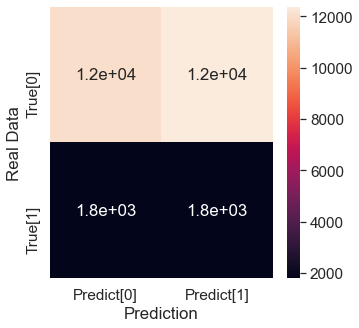

,Predict[0],Predict[1]
True[0],12019,12388
True[1],1797,1796


In [289]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_d_lr),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [290]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------Distribution-SMOTE + Logistic Regression--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_d_lr))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_d_lr))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_d_lr))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_d_lr))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_d_lr))

--------Distribution-SMOTE + Logistic Regression--------
정확도 accuracy: 0.493
정밀도 precision: 0.127
재현율 recall: 0.500
F1-score: 0.202
AUC: 0.496


### 5-4. Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

start = time.time()

clf_d_NN = MLPClassifier()
clf_d_NN.fit(X_train_d, y_train_d)

print("time :", time.time() - start) 

time : 393.6328055858612


In [85]:
y_pred_d_NN = clf_d_NN.predict(X_test_sc)

In [88]:
print("Distribution-SMOTE + Neural Network - train_score : %.4f, test score : %.4f" % (clf_d_NN.score(X_train_d, y_train_d), clf_d_NN.score(X_test_sc, y_test)))

Distribution-SMOTE + Neural Network - train_score : 0.6375, test score : 0.1283


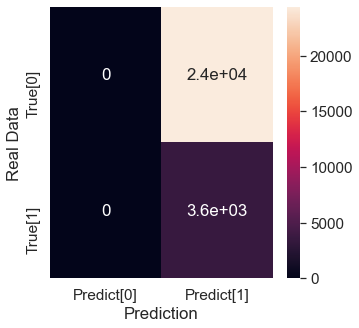

,Predict[0],Predict[1]
True[0],0,24407
True[1],0,3593


In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confmat=pd.DataFrame(confusion_matrix(y_test, y_pred_d_NN),
                    index=['True[0]', 'True[1]'],
                    columns=['Predict[0]', 'Predict[1]'])

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(confmat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
confmat

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("--------ADASYN + Neural Network--------")
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred_d_NN))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_d_NN))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_d_NN))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_d_NN))
print('AUC: %.3f' % roc_auc_score(y_test, y_pred_d_NN))

--------ADASYN + Neural Network--------
정확도 accuracy: 0.128
정밀도 precision: 0.128
재현율 recall: 1.000
F1-score: 0.227
AUC: 0.500
